# Music Feature Extraction in Python

In [94]:
import pandas as pd
import numpy as np 
import librosa 
import librosa.display
import matplotlib.pyplot as plt

Changing the directory

In [95]:
import os
os.chdir("D:\Avantika University\Summer Internship\Voice Samples for Project\Emotional Voices\Samples in English\EV_E_01")

In [96]:
os.getcwd()

'D:\\Avantika University\\Summer Internship\\Voice Samples for Project\\Emotional Voices\\Samples in English\\EV_E_01'

Loading the Audio

In [97]:
audio_path = 'EV_E_01_Anger.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


.load loads an audio file and decodes it into a 1-dimensional array which is a time series x , and sr is a sampling rate of x 

Changing the sampling rate

In [98]:
librosa.load(audio_path, sr=44100)

(array([ 0.00540161,  0.00552368,  0.00564575, ..., -0.00250244,
        -0.00244141, -0.00253296], dtype=float32),
 44100)

Playing the audio

In [99]:
import IPython.display as ipd
ipd.Audio('EV_E_01_Anger.wav')

Waveplot

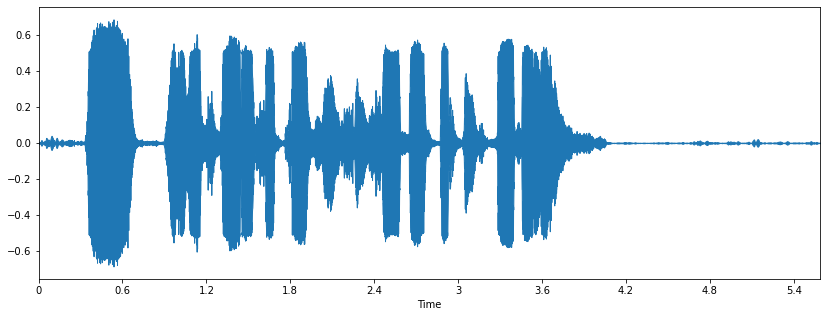

In [100]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Spectogram: Representation of frequencies changing with respect to time for given music signals.

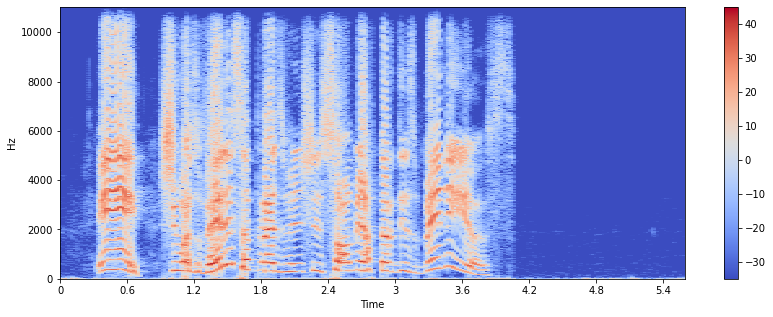

In [101]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

.stft converts data into short term Fourier transform

Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display spectogram.

# Feature Extraction

Zero crossing Rate

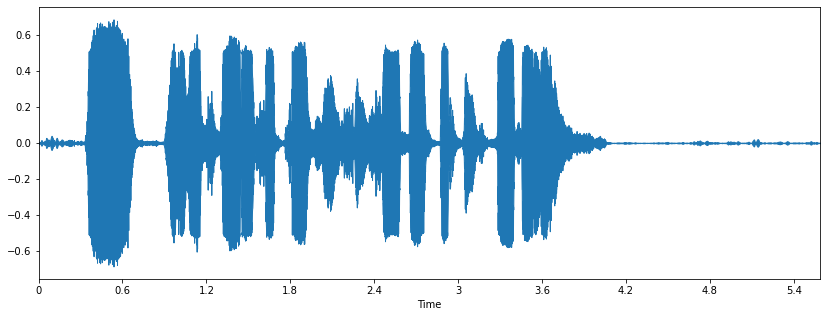

In [102]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

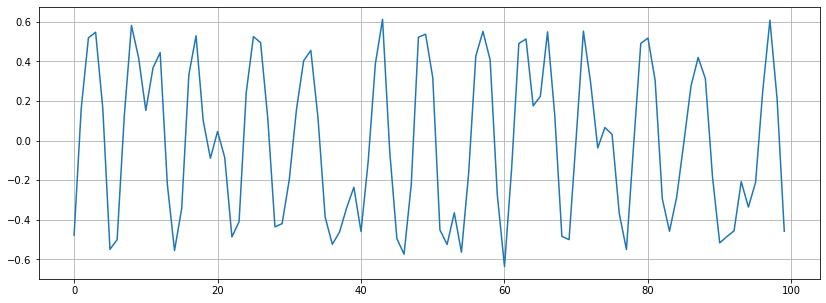

In [103]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [104]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

30


In [105]:
zero_crossings.shape

(100,)

# Mel-frequency cepstral coefficients(MFCC)

(20, 241)


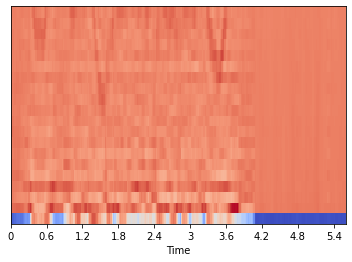

In [106]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [107]:
mfccs


array([[-499.71     , -498.46634  , -493.53046  , ..., -527.1973   ,
        -526.6745   , -525.3702   ],
       [  36.61445  ,   36.58429  ,   40.281708 , ...,   15.524925 ,
          16.861282 ,   18.762573 ],
       [  13.585798 ,   12.088514 ,   10.150874 , ...,   13.568296 ,
          15.468827 ,   16.928259 ],
       ...,
       [  10.457071 ,   11.337272 ,   12.324645 , ...,    9.342613 ,
           7.608862 ,    7.980899 ],
       [   1.8429277,    4.356692 ,    9.096285 , ...,    7.6891212,
           7.6553206,    7.011969 ],
       [   8.171284 ,    9.155766 ,   10.218967 , ...,    8.094826 ,
           7.6554966,    7.0081406]], dtype=float32)

In [108]:
mfccs.shape

(20, 241)

In [109]:
pip install spafe

Note: you may need to restart the kernel to use updated packages.


# Gammatone-frequency cepstral coefﬁcients (GFCC features)

Simplified Python Audio-Features Extraction

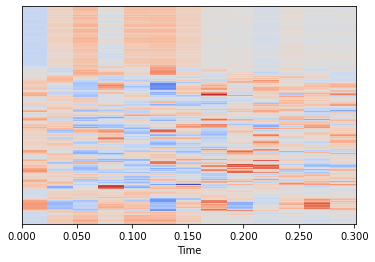

In [136]:
import scipy.io.wavfile
import spafe.utils.vis as vis
from spafe.features.gfcc import gfcc


#read wave file
fs, sig = scipy.io.wavfile.read('EV_E_01_Anger.wav')

# compute gfccs
gfccs  = gfcc(sig, fs=16000, num_ceps=13, pre_emph=0, pre_emph_coeff=0.97, win_len=0.025, win_hop=0.01, win_type='hamming', nfilts=26, nfft=512, low_freq=None, high_freq=None, scale='constant', dct_type=2, use_energy=False, lifter=22, normalize=1)

#Displaying  the MFCCs:
librosa.display.specshow(gfccs, sr=sr, x_axis='time')

In [111]:
gfccs

array([[-0.94705984,  0.40117491,  0.99153959, ..., -0.19541787,
        -0.58445862, -0.42785257],
       [-0.96494243,  0.37366892,  0.89915392, ..., -0.10931992,
        -0.47503839, -0.34023272],
       [-0.98459994,  0.25821227,  0.74436973, ..., -0.02877113,
        -0.19794931, -0.09714451],
       ...,
       [-1.05390396,  0.24448476,  0.98405753, ..., -0.06941564,
        -0.22621005, -0.24384081],
       [-1.08889533,  0.09401892,  0.73747934, ..., -0.08327081,
        -0.12911669, -0.17748578],
       [-1.10139357,  0.10407554,  0.71547549, ...,  0.01804505,
        -0.04399248, -0.04562696]])

# Linear -frequency cepstral coefﬁcients (GFCC features)

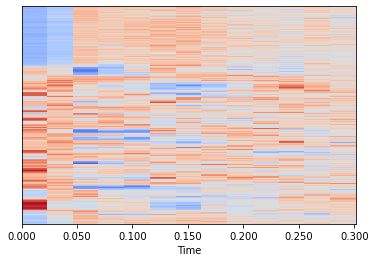

In [135]:
import scipy.io.wavfile
import spafe.utils.vis as vis
from spafe.features.lfcc import lfcc


#read wave file
fs, sig = scipy.io.wavfile.read('EV_E_01_Anger.wav')

# compute lfccs
lfccs  = lfcc(sig, fs=16000, num_ceps=13, pre_emph=0, pre_emph_coeff=0.97, win_len=0.025, win_hop=0.01, win_type='hamming', nfilts=26, nfft=512, low_freq=None, high_freq=None, scale='constant', dct_type=2, use_energy=False, lifter=22, normalize=1)

librosa.display.specshow(lfccs, sr=sr, x_axis='time')


In [121]:
lfccs

array([[-2.01636630e+00, -9.25424234e-01,  8.42236089e-01, ...,
        -3.94562588e-01, -2.85030645e-01, -2.82910054e-01],
       [-2.09900105e+00, -9.76734316e-01,  9.48188792e-01, ...,
        -2.20539660e-03,  1.60262464e-01, -5.95850606e-02],
       [-1.99223306e+00, -1.05212318e+00,  1.23718334e+00, ...,
        -8.49886307e-01, -2.15395093e-02, -3.55625714e-01],
       ...,
       [-2.24834052e+00, -1.63625622e+00,  6.12579252e-01, ...,
        -8.22166501e-02,  3.22937130e-01, -3.74658192e-01],
       [-2.21927455e+00, -1.69836920e+00,  6.19293822e-01, ...,
        -1.19238492e+00, -1.11195413e-01, -7.05992758e-01],
       [-2.32167471e+00, -1.70206350e+00,  7.18612164e-01, ...,
        -7.64831241e-01,  1.82429127e-01, -5.73401248e-01]])

# Bark-frequency cepstral coefﬁcients (BFCC features)

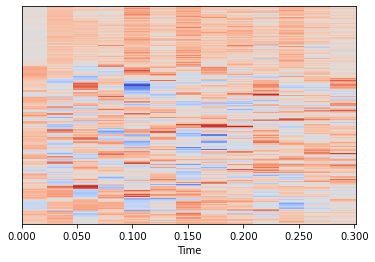

In [130]:
import scipy.io.wavfile
import spafe.utils.vis as vis
from spafe.features.bfcc import bfcc


#read wave file
fs, sig = scipy.io.wavfile.read('EV_E_01_Anger.wav')

# compute bfccs
bfccs = bfcc(sig, fs=16000, num_ceps=13, pre_emph=0, pre_emph_coeff=0.97, win_len=0.025, win_hop=0.01, win_type='hamming', nfilts=26, nfft=512, low_freq=None, high_freq=None, scale='constant', dct_type=2, use_energy=False, lifter=22, normalize=1)

librosa.display.specshow(bfccs, sr=sr, x_axis='time')


In [114]:
bfccs

array([[-0.17542588,  0.93293561, -0.49621715, ...,  0.29193485,
        -0.29618723, -0.83864724],
       [-0.23185818,  1.09551359, -0.2285162 , ..., -0.73156479,
        -0.10186024,  0.03642062],
       [-0.17552337,  0.95090605, -0.63942219, ...,  0.74847826,
        -0.50025772, -0.29155939],
       ...,
       [-0.6502387 ,  0.29847857, -0.12081604, ...,  0.88819142,
        -0.68335189, -0.08401316],
       [-0.59656774,  0.3896843 , -0.04637229, ...,  1.26966346,
        -0.24704555, -0.67637563],
       [-0.68148213,  0.52314328,  0.16117541, ...,  0.90836423,
         0.19773992, -1.01513164]])

# Normalized gammachirp cepstral coefﬁcients (NGCC features) 

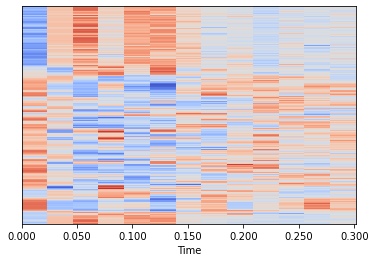

In [131]:
import scipy.io.wavfile
import spafe.utils.vis as vis
from spafe.features.ngcc import ngcc


#read wave file
fs, sig = scipy.io.wavfile.read('EV_E_01_Anger.wav')

# compute ngccs
ngccs  = ngcc(sig, fs=16000, num_ceps=13, pre_emph=0, pre_emph_coeff=0.97, win_len=0.025, win_hop=0.01, win_type='hamming', nfilts=26, nfft=512, low_freq=None, high_freq=None, scale='constant', dct_type=2, use_energy=False, lifter=22, normalize=1)

librosa.display.specshow(ngccs, sr=sr, x_axis='time')

In [118]:
ngccs

array([[-1.51947089,  0.73361645,  1.51136817, ..., -0.46794682,
        -0.96696285, -0.56016618],
       [-1.6491901 ,  0.77915263,  1.1769673 , ..., -0.20829149,
        -1.03706183, -0.51189084],
       [-1.78421705,  0.74890095,  0.70124886, ...,  0.02045341,
        -0.61827518, -0.11747643],
       ...,
       [-2.09817826,  0.62324063,  1.70428564, ..., -0.1477827 ,
        -0.344994  , -0.35791736],
       [-2.34700915,  0.33212371,  0.71537317, ..., -0.47164528,
        -0.21018091, -0.17131877],
       [-2.43291373,  0.42790732,  0.59324523, ..., -0.0242928 ,
         0.13421935,  0.30976914]])

# Magnitude-based Spectral Root Cepstral Coefﬁcients (MSRCC) 

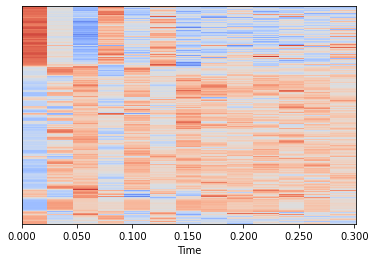

In [132]:
import scipy.io.wavfile
import spafe.utils.vis as vis
from spafe.features.msrcc import msrcc


#read wave file
fs, sig = scipy.io.wavfile.read('EV_E_01_Anger.wav')
msrccs = msrcc(sig, fs=16000, num_ceps=13, pre_emph=0, pre_emph_coeff=0.97, win_len=0.025, win_hop=0.01, win_type='hamming', nfilts=26, nfft=512, low_freq=None, high_freq=None, scale='constant', gamma=-0.14285714285714285, dct_type=2, use_energy=False, lifter=22, normalize=1)

librosa.display.specshow(msrccs, sr=sr, x_axis='time')

In [124]:
msrccs

array([[ 1.75979174, -1.09497332, -0.81860035, ...,  0.96443019,
        -0.03027103,  0.20146282],
       [ 1.87300995, -1.35508111, -1.33147728, ..., -0.76131297,
         1.60680387, -0.31889591],
       [ 1.7315449 , -1.15448519, -0.9599732 , ..., -0.59853545,
         0.19976378,  1.02560086],
       ...,
       [ 2.40732324, -0.29899382, -1.65863796, ..., -1.78634576,
        -0.82121312,  0.64107939],
       [ 2.36421386, -0.25243521, -1.81114917, ..., -1.36724495,
        -2.43053669, -0.03323926],
       [ 2.51276362, -0.56195843, -2.11743503, ..., -0.56908461,
        -1.54375319, -1.01576062]])

# Power-normalized cepstral coefficients (SPNCC features)

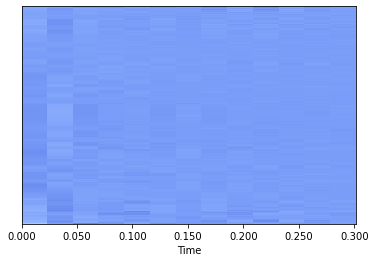

In [133]:
import scipy.io.wavfile
import spafe.utils.vis as vis
from spafe.features.pncc import pncc


#read wave file
fs, sig = scipy.io.wavfile.read('EV_E_01_Anger.wav')
pnccs = pncc(sig, fs=16000, num_ceps=13, pre_emph=0, pre_emph_coeff=0.97, power=2, win_len=0.025, win_hop=0.01, win_type='hamming', nfilts=26, nfft=512, low_freq=None, high_freq=None, scale='constant', dct_type=2, use_energy=False, dither=1, lifter=22, normalize=1)
librosa.display.specshow(pnccs, sr=sr, x_axis='time')

In [126]:
pnccs

array([[ 47.72751827,  -9.65221222, -11.78329702, ...,  -3.95475498,
          0.32754363,  -0.41602917],
       [  7.97990747,   0.3667324 ,  -4.05409953, ...,  -0.1533122 ,
         -0.38612493,   0.37509472],
       [  5.32966547,  -0.51020517,   0.97661677, ...,   1.96388193,
         -0.96896197,   0.87301539],
       ...,
       [  1.95312144,  -0.48172874,   0.93052485, ...,   0.50003156,
         -0.7432631 ,   0.35600155],
       [  1.7204647 ,   0.9584915 ,  -0.17051445, ...,   1.41155484,
         -0.67410871,   0.57538724],
       [  2.89081052,   1.83236876,  -3.60176533, ...,   0.2059056 ,
         -0.37521694,   0.25703908]])